In [237]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.endpoint import *
from aeons.plotting import *
from anesthetic import make_1d_axes
figsettings()

In [3]:
def get_beta(points, ndead):
    logX = points.logX().iloc[ndead]
    if logX < -points.D_KL():
        return 1
    def func(beta):
        return logX + points.set_beta(beta).D_KL()
    from scipy import optimize
    res = optimize.root_scalar(func, bracket=[0, 1])
    return res.root

def get_dGs(samples, iterations, Nset=10):
    """Get the dG of the samples at each iteration"""
    iterations = iterations.astype(int)
    d_Gs = np.zeros(len(iterations))
    d_Gs_std = np.zeros(len(iterations))
    for i, iteration in enumerate(iterations):
        points = points_at_iteration(samples, iteration)
        beta = get_beta(points, iteration)
        points = points.set_beta(beta)
        d_Gs_i = points.d_G(Nset)
        d_Gs[i] = d_Gs_i.mean()
        d_Gs_std[i] = d_Gs_i.std()
        # Print progress bar
        print('\r', f'Iteration {iteration} of {iterations[-1]}', end='')
    return d_Gs, d_Gs_std

## **Planck gaussian**

In [2]:
name, samples = get_samples('toy', 'planck_gaussian')
model = EndModel(samples)
true_endpoint = model.true_endpoint()

In [3]:
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('planck_gaussian_logXfs.txt')
iterations, d_Gs, d_Gs_std = read_from_txt('planck_gaussian_dGs.txt')

Text(0.5, 0.98, 'Planck Gaussian')

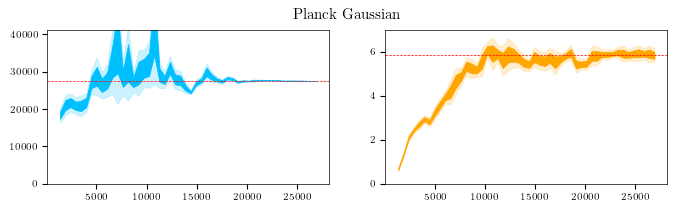

In [4]:
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=750)

fig, axs = plt.subplots(1, 2, figsize=(8, 2))
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0, 1.5), ax=axs[0])
plot_std(iterations, d_Gs, d_Gs_std, d_Gs[-1], ylim=(0, 1.2), ax=axs[1], color='orange')
fig.suptitle('Planck Gaussian')

Let's now look at the distribution of samples at an intermediate iteration

Text(0.5, 1.05, '$\\tilde{d}$ = 3.19')

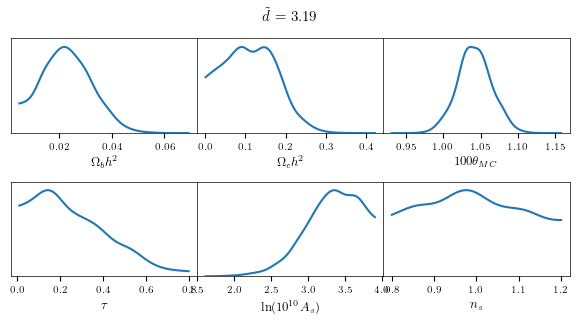

In [7]:
ndead = 5000
points = points_at_iteration(samples, ndead)
beta = get_beta(points, ndead)
points = points.set_beta(beta)

columns = points.drop_labels().columns[:6]
fig, ax = make_1d_axes(columns, figsize=(6,3))
points.plot_1d(ax);
fig.suptitle(f"$\\tilde{{d}}$ = {points.d_G():.2f}", y=1.05)

Text(0.5, 1.05, '$\\tilde{d}$ = 5.90')

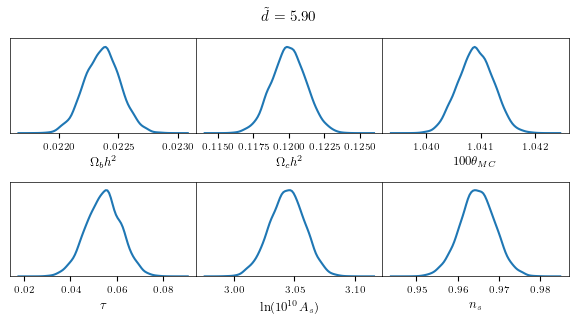

In [17]:
ndead = 25000
points = points_at_iteration(samples, ndead)
beta = get_beta(points, ndead)
points = points.set_beta(beta)

columns = points.drop_labels().columns[:6]
fig, ax = make_1d_axes(columns, figsize=(6,3))
points.plot_1d(ax);
fig.suptitle(f"$\\tilde{{d}}$ = {points.d_G():.2f}", y=1.05)

## Planck

In [73]:
name, samples = get_samples('lcdm', 'planck')

Text(0.5, 1.05, '$\\tilde{d}$ = 9.03')

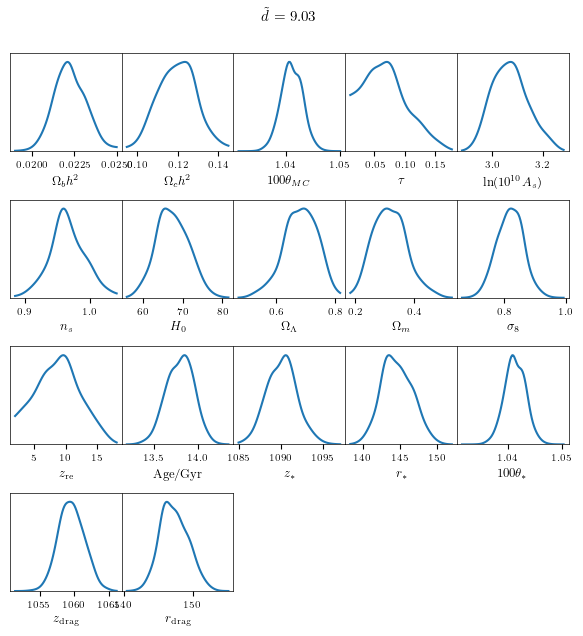

In [87]:
ndead = 20000
points = points_at_iteration(samples, ndead)
beta = get_beta(points, ndead)
points = points.set_beta(beta)

columns = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns', 
           'H0', 'omegal', 'omegam', 'sigma8', 'zrei', 'age', 'zstar', 'rstar', 'thetastar', 'zdrag', 'rdrag'] 
fig, ax = make_1d_axes(columns, figsize=(6,6))
points.plot_1d(ax);
fig.suptitle(f"$\\tilde{{d}}$ = {points.d_G():.2f}", y=1.05)

In [123]:
def maximize_d_G(points, x0):
    def func(beta):
        return -points.set_beta(beta).d_G()
    from scipy.optimize import minimize
    res = minimize(func, x0)
    return res

In [124]:
maximize_d_G(points, 0.01)

TypeError: 'int' object is not iterable

/tmp/ipykernel_289760/3843487104.py:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


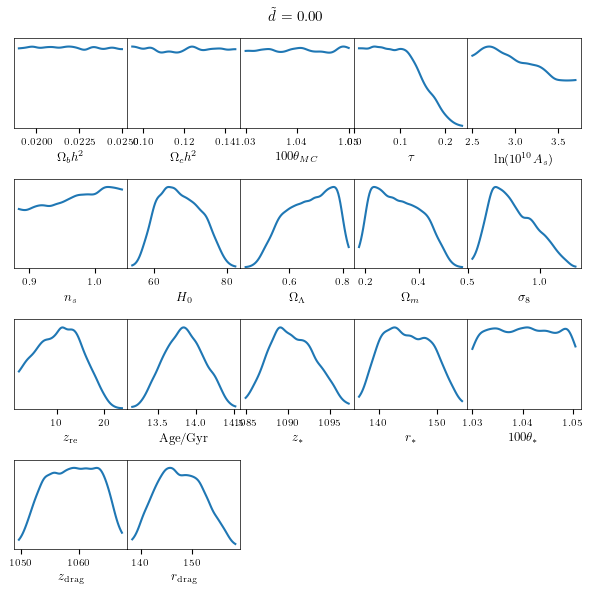

In [86]:
ndead = 1
points = points_at_iteration(samples, ndead)
beta = get_beta(points, ndead)
points = points.set_beta(beta)

columns = ['omegabh2', 'omegach2', 'theta', 'tau', 'logA', 'ns', 
           'H0', 'omegal', 'omegam', 'sigma8', 'zrei', 'age', 'zstar', 'rstar', 'thetastar', 'zdrag', 'rdrag'] 
fig, ax = make_1d_axes(columns, figsize=(6,6))
points.plot_1d(ax);
fig.suptitle(f"$\\tilde{{d}}$ = {points.d_G():.2f}")
fig.tight_layout()

## BAO

In [53]:
name, samples = get_samples('lcdm', 'BAO')
model = EndModel(samples)
true_endpoint = model.true_endpoint()

Text(0.5, 0.98, 'BAO')

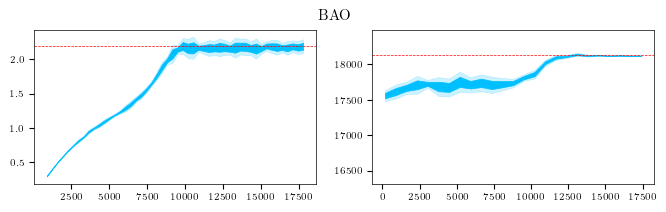

In [58]:
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('../summer_4/lcdm/nos/BAO_bt_25_nos.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000, nconst=9000, logXconst=samples.logX().iloc[9000])

iterations_dG, d_Gs, d_Gs_std = read_from_txt('BAO_dG.txt')

fig, axs = plt.subplots(1, 2, figsize=(8, 2))
plot_std(iterations_dG, d_Gs, d_Gs_std, d_Gs[-1], ax=axs[0])
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0.9, 1.02), ax=axs[1])
fig.suptitle('BAO')

## Lensing

In [68]:
name, samples = get_samples('lcdm', 'lensing')

Text(0.5, 0.98, 'lensing')

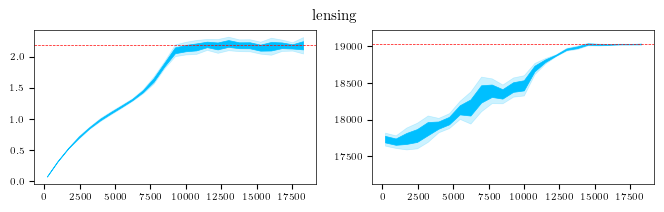

In [69]:
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('../summer_4/lcdm/nos/lensing_bt_25_nos.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000, nconst=9000, logXconst=samples.logX().iloc[9000])

iterations, d_Gs, d_Gs_std = read_from_txt('lensing_dG.txt')

fig, axs = plt.subplots(1, 2, figsize=(8, 2))
plot_std(iterations, d_Gs, d_Gs_std, d_Gs[-1], ax=axs[0])
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0.9, 1.01), ax=axs[1])
fig.suptitle(f'{name}')

## Lensing_BAO

Text(0.5, 0.98, 'lensing_BAO')

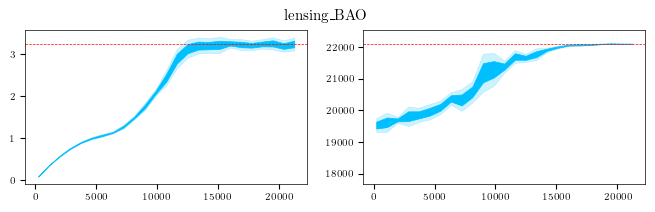

In [75]:
name, samples = get_samples('lcdm', 'lensing_BAO')
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('../summer_4/lcdm/nos/lensing_BAO_bt_25_nos.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000, nconst=9000, logXconst=samples.logX().iloc[9000])

iterations, d_Gs, d_Gs_std = read_from_txt('lensing_BAO_dGs.txt')

fig, axs = plt.subplots(1, 2, figsize=(8, 2))
plot_std(iterations, d_Gs, d_Gs_std, d_Gs[-1], ax=axs[0])
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0.8, 1.02), ax=axs[1])
fig.suptitle(f"{name}")

## Planck

In [76]:
name, samples = get_samples('lcdm', 'planck')
iterations, logXfs, logXfs_std, true_endpoint = read_from_txt('../summer_4/lcdm/nos/planck_bt_25_nos.txt')
iterations, d_Gs, d_Gs_std = read_from_txt('planck_dG.txt')
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=1000, nconst=9000, logXconst=samples.logX().iloc[9000])

Text(0.5, 1.1, 'planck')

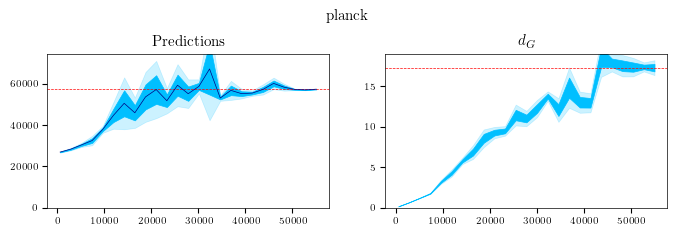

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
axs = axs.flatten()
plot_std(iterations, endpoints, endpoints_std, true_endpoint, ylim=(0, 1.3), ax=axs[0])
plot_std(iterations, d_Gs, d_Gs_std, d_Gs[-1], ylim=(0, 1.1), ax=axs[1])
axs[0].plot(iterations, endpoints, color='navy', lw=.5)
axs[0].set_title('Predictions')
axs[1].set_title(r"$d_G$")
fig.suptitle(f"{name}", y=1.1)

## Constructed correlated Gaussian

In [96]:
from anesthetic.examples.perfect_ns import correlated_gaussian

ndims = 2
mean = 0.5 * np.ones(ndims)
cov = np.diag([1e-3, 1e-6])

In [43]:
phi = np.pi/4
R = np.array([[np.cos(phi), -np.sin(phi)], [np.sin(phi), np.cos(phi)]])
cov_rot = R @ cov @ R.T

In [97]:
samples = correlated_gaussian(500, mean, cov)
model = EndModel(samples)
true_endpoint = model.true_endpoint()

In [278]:
name, samples = get_samples('toy', 'gauss_36')
model = EndModel(samples)
true_endpoint = model.true_endpoint()

Text(0.5, 0.95, 'Gaussian with $\\Sigma = \\mathrm{diag}(10^{-3}, 10^{-6})$')

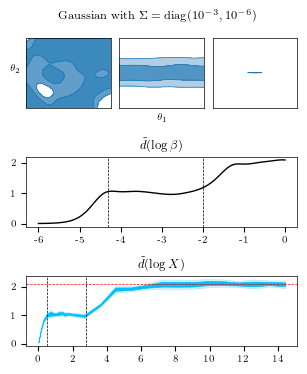

In [295]:
from matplotlib.gridspec import GridSpec
from anesthetic import make_2d_axes

iterations, d_Gs, d_Gs_std = read_from_txt(f'{aeons_dir}/data/predictions/gauss/gauss_36_dG.txt')

# Create a 2x2 grid of subplots
fig = plt.figure(figsize=(3.5, 4))
gs = GridSpec(3, 3, wspace=0.1, hspace=.7)

# First row: Two boxes
_, ax1 = make_2d_axes([0, 1], upper=False, diagonal=False, fig=fig, subplot_spec=gs[0, 0])
_, ax2 = make_2d_axes([0, 1], upper=False, diagonal=False, fig=fig, subplot_spec=gs[0, 1])
_, ax3 = make_2d_axes([0, 1], upper=False, diagonal=False, fig=fig, subplot_spec=gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])
ax5 = fig.add_subplot(gs[2, :])

samples.set_beta(1e-6).plot_2d(ax1)
samples.set_beta(1e-4).plot_2d(ax2)
samples.set_beta(1).plot_2d(ax3)

betas = np.logspace(-6, 0, 100)
samples.d_G(beta=betas).plot(ax=ax4, logx=True, lw=1, color='k')
plot_std(-samples.logX().iloc[iterations], d_Gs, d_Gs_std, d_Gs[-1], ax=ax5)

ax4.axvline(x=10**(-4.3), lw=.5, ls='--', color='k')
ax4.axvline(x=10**(-2), lw=.5, ls='--', color='k')
ax5.axvline(x=.5, lw=.5, ls='--', color='k')
ax5.axvline(x=2.8, lw=.5, ls='--', color='k')

for ax in [ax1, ax2, ax3]:
    ax = ax.iloc[0,0]
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')

ax2.iloc[0,0].set_xlabel(r'$\theta_1$')
ax1.iloc[0,0].set_ylabel(r'$\theta_2$', rotation=0, labelpad=8)
ax4.set_xticks(10**np.arange(-6, 1, dtype=float), [f"{beta:.0f}" for beta in np.arange(-6, 1)])
ax4.set_xlabel('')
ax4.set_title('$\\tilde{d}(\\log \\beta)$')
ax4.minorticks_off()
ax5.set_title('$\\tilde{d}(\\log X)$')
fig.suptitle('Gaussian with $\\Sigma = \\mathrm{diag}(10^{-3}, 10^{-6})$', y=.95)

<Axes: xlabel='beta'>

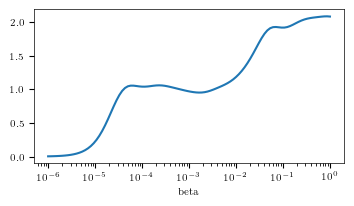

In [220]:
betas = np.logspace(-6, 0, 100)
d_Gs = samples.d_G(nsamples=10, beta=betas).unstack()
d_Gs.mean(axis=1).plot(logx=True)

In [241]:
iterations_0 = make_iterations(true_endpoint, 10, start=0.001, end=0.1)
iterations_1 = make_iterations(true_endpoint, 15, start=0.1)
iterations = np.concatenate([iterations_0, iterations_1])
d_Gs = np.zeros(len(iterations))
d_Gs_std = np.zeros(len(iterations))
for i, ndead in enumerate(iterations):
    points = points_at_iteration(samples, ndead).recompute()
    beta = get_beta(points, ndead)
    d_Gs[i] = points.d_G(nsamples=10, beta=beta).mean()
    d_Gs_std[i] = points.d_G(nsamples=10, beta=beta).std()
    # Print progress bar
    print('\r', f"Iteration {ndead} of {iterations[-1]}", end='')

 Iteration 12206 of 12206

In [242]:
write_to_txt(f'{data_dir}/predictions/gauss/gauss_36_dG.txt', [iterations, d_Gs, d_Gs_std])

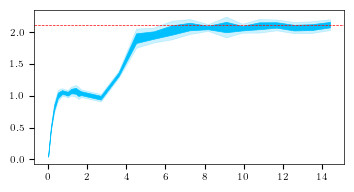

In [203]:
plot_std(-samples.logX().iloc[iterations], d_Gs, d_Gs_std, d_Gs[-1])

Text(0.5, 0, '$\\beta$')

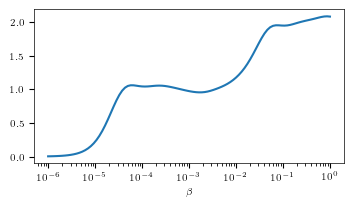

In [99]:
betas = np.logspace(-6, 0, 100)
samples.d_G(beta=betas).plot(logx=True)
plt.xlabel(r'$\beta$')

In [50]:
iterations = make_iterations(true_endpoint, 25)
logXfs, logXfs_std = model.logXfs(theta_bandwidth, iterations, Nset=25, splits=1)

 Iteration 7702 of 7702, 16 samples

In [51]:
d_Gs, d_Gs_std = get_dGs(samples, iterations)

 Iteration 7702 of 7702

Text(0.5, 1.1, 'Correlated Gaussian')

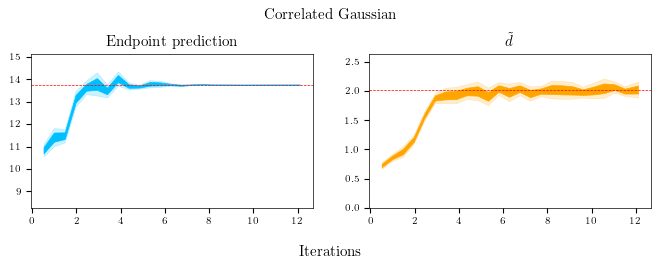

In [52]:
logXf_true = samples.logX().iloc[true_endpoint]
logXs = samples.logX().iloc[iterations]
endpoints, endpoints_std = calc_endpoints(iterations, logXs, logXfs, logXfs_std, nlive=705)
fig, axs = plt.subplots(1, 2, figsize=(8, 2))
plot_std(-logXs, -logXfs, logXfs_std, -logXf_true, ylim=(0.6, 1.1), color='deepskyblue', ax=axs[0])
plot_std(-logXs, d_Gs, d_Gs_std, d_Gs[-1], (0, 1.3), color='orange', ax=axs[1])
axs[0].set_title('Endpoint prediction')
axs[1].set_title(f'$\\tilde{{d}}$')
fig.supxlabel('Iterations', y=-0.15)
fig.suptitle('Correlated Gaussian', y=1.1)

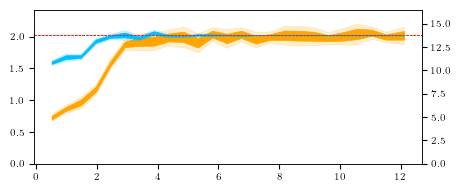

In [53]:
# Plot d_Gs and logXfs on same plot
fig, ax = plt.subplots(figsize=(5,2))
ax1 = ax.twinx()
plot_std(-logXs, -logXfs, logXfs_std, -logXf_true, ylim=(0, 1.2), ax=ax1, color='deepskyblue')
plot_std(-logXs, d_Gs, d_Gs_std, d_Gs[-1], ylim=(0, 1.2), ax=ax, color='orange')

In [110]:
%matplotlib inline
plt.plot(samples.logX(), samples.logL)